Bonjour monsieur,
Ce travail est realisé par:
**JABORI YASSINE** 

j'ai focalisé mon travail sur les annonces des voitures professionnel du site avito.ma

# le code de web scraping


In [ ]:


# Chargement des modules
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np


filename ="voitures.csv"
# OUVRIR LE FICHIER AVEC LE DROIT D'ECRITURE
fic = open(filename, "w")
# L'EN-TETE DU FICHIER CSV (nom des colonnes )
headers = "Année-Modèle,KM_Min,KM_Max,Carburant,Marqu,Modèle,PuissanceFiscale,Ville,Secteur,Date_de_publication,Temps_de_publication,Prix\n"
# ECRIRE L'EN-TETE DANS LE FICHIER
fic.write(headers)

prix=0
fg=1
# LE SITE WEB DES VOITURES CONTIENT 173 PAGES CHAQUE PAGES CONTIENT 35 ANNONCES
for n in np.arange(1,174):
    try:
        # LA SEULE DIFFERENCES ENTRE CES 173 LIENS EST LE DERNIER CARACTERE C'EST POUR çA ON VA BOUCLER SUR CET ENTIER
        avitoUrl = 'https://www.avito.ma/fr/maroc/voitures-à_vendre?f=c&o={}'.format(n)
        r = requests.get(avitoUrl)
        data = r.text
        soup = BeautifulSoup(data, 'html.parser')

        # EXTRAIRE LES INFORMATIONS DE CHAQUE ANNONCES
        # EXTRAIRE LES LIENS
        containers = soup.findAll("a",{"tabindex":"1"})
        for container in containers:
            a=(container["href"])
            annUrl = a
            rr = requests.get(annUrl)
            dataa = rr.text
            soup = BeautifulSoup(dataa, 'html.parser')

            # Extraire les villes 
            containers2 = soup.findAll("div", {"class": "panel-body list-big list-big-icons panel-body-smallpadding"})
            for container in containers2:
                Ville = (container.h2.get_text())
            
            # extraire la date et le temps de la publication de l'annonce
            containers3 = soup.findAll("abbr", {"class": "date dtstart value"})
            for container in containers3:
                date,temps  = (container["title"].split("T"))

            # extraire le prix de la voiture 
            containers4 = soup.findAll("h2", {"class": "price-header fs18"})
            for container in containers4:
                prix = (container.span.get_text())
            
            # extraire le Année-Modèle , KM_Min , KM_Max , Carburant , Marqu , Modèle , PuissanceFiscale , Secteur,
            cont = soup.findAll("li")
            try:
                f = len(cont)
                b = []
                for i in np.arange(f - 25, f - 18):
                    x, y = cont[i].text.split(":")
                    b.append(str(y).strip())
                e, ee = b[1].split('-')
                b[1] = e
                b.append(ee)

                if prix == fg:
                    prix=0
                # ecrire les donnees extraite dans le fichier 
                fic.write(b[0] + "," + b[1] + "," + b[7] + "," + b[2] + "," + b[3] + "," + b[4] + "," + b[5] + "," + Ville + "," + b[6] + "," + date + "," + temps + "," + prix + "\n")
                fg=prix
            except :
                print("erreur")
    except:
        print('waili')
fic.close()

# 1. Chargement des modules


In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import os
print(os.listdir("."))

['.config', 'sample_data']


# 2. Chargement des données

In [ ]:
df = pd.read_csv("voitr.csv", encoding="ISO-8859-1", error_bad_lines=False)

#Information générales sur les données

In [ ]:
df.head(5)

,Année-Modèle,KM_Min,KM_Max,Carburant,Marqu,Modèle,PuissanceFiscale,Ville,Secteur,Date_de_publication,Temps_de_publication,Prix
0,2005,170 000,179 999,Diesel,Audi,A3,8 CV,Casablanca,Sidi Othmane,2020-03-31,15:20:11,62 000
1,2014,100 000,109 999,Diesel,BMW,Serie 1,8 CV,Rabat,Hay Nahda,2020-03-31,15:12:38,200 000
2,2002,0,4 999,Diesel,Citroen,XSARA,7 CV,Kénitra,Al Maghrib Al Arabi,2020-03-31,15:10:33,45 000
3,2018,0,4 999,Electrique,Autres,Autres,4 CV,Mohammedia,Les Cretes,2020-03-31,15:07:34,49 000
4,2011,180 000,189 999,Diesel,Land Rover,Range Rover Sport,12 CV,Kénitra,Al Maghrib Al Arabi,2020-03-31,15:06:32,215 000


In [ ]:
df.describe()

,Année-Modèle,KM_Min,KM_Max,Carburant,Marqu,Modèle,PuissanceFiscale,Ville,Secteur,Date_de_publication,Temps_de_publication,Prix
count,2037,2029,2029,2037,2037,2037,2037,2037,2036,2037,2037,2037
unique,41,36,36,5,46,321,28,49,170,131,1981,308
top,2016,100 000,109 999,Diesel,Volkswagen,-,6 CV,Casablanca,Autre secteur,2020-03-31,09:09:56,
freq,267,149,149,1684,217,121,672,863,246,184,3,33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Année-Modèle          2037 non-null   object
 1   KM_Min                2029 non-null   object
 2   KM_Max                2029 non-null   object
 3   Carburant             2037 non-null   object
 4   Marqu                 2037 non-null   object
 5   Modèle                2037 non-null   object
 6   PuissanceFiscale      2037 non-null   object
 7   Ville                 2037 non-null   object
 8   Secteur               2036 non-null   object
 9   Date_de_publication   2037 non-null   object
 10  Temps_de_publication  2037 non-null   object
 11  Prix                  2037 non-null   object
dtypes: object(12)
memory usage: 191.1+ KB


# Information sur les voitures 


nombre de voitures avec carburant essence:
323
nombre de voitures avec carburant Diesel:
1684
nombre de voitures avec carburant electrique:
9


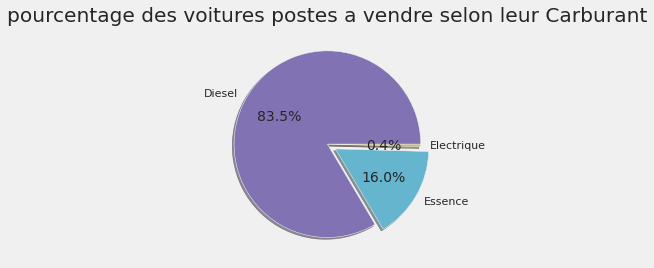

In [ ]:
 # pourcentage des voitures postés à vendre selon leur Carburant

plt.style.use('fivethirtyeight')
Diesel=0 ;Essence=0 ;Electrique = 0
for i in range(len(df)):
  if df['Carburant'][i]=='Diesel':
    Diesel += 1
  if df['Carburant'][i]=='Essence':
    Essence += 1
  if df['Carburant'][i]=='Electrique':
    Electrique += 1
slices=[Diesel , Essence, Electrique]
act=['Diesel' , 'Essence','Electrique']
cols=['m','c','y']
print("nombre de voitures avec carburant essence:")
print(Essence)
print("nombre de voitures avec carburant Diesel:")
print(Diesel)
print("nombre de voitures avec carburant electrique:")
print(Electrique)
plt.title("pourcentage des voitures postes a vendre selon leur Carburant")
plt.pie(slices,labels=act,colors=cols,autopct='%1.1f%%',shadow=True,explode=(0,0.1,0))
plt.show()

Text(0.5, 1.0, 'Année-Modèl de Voitures annoncés')

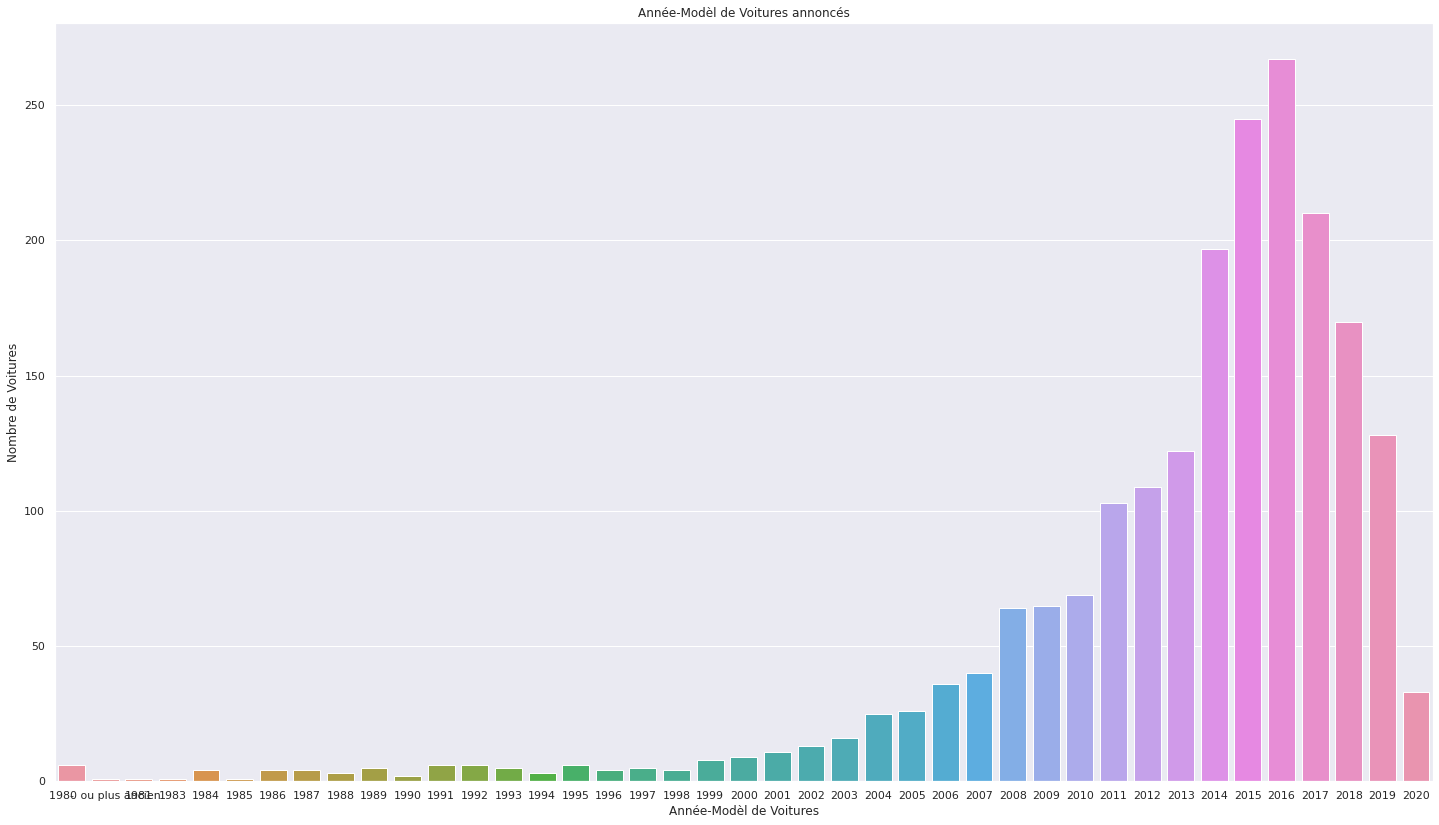

In [ ]:
#Année-Modèl des Voitures annoncés

sns.set(style='darkgrid')
plt.figure(figsize=(22, 13))
sns.countplot(x=sorted(df['Année-Modèle']),data=df)
plt.ylabel('Nombre de Voitures')
plt.xlabel('Année-Modèl de Voitures')
plt.title('Année-Modèl de Voitures annoncés')

puissance fiscale des voitures annoncés


Text(0.5, 1.0, 'Année-Modèl de Voitures annoncés')

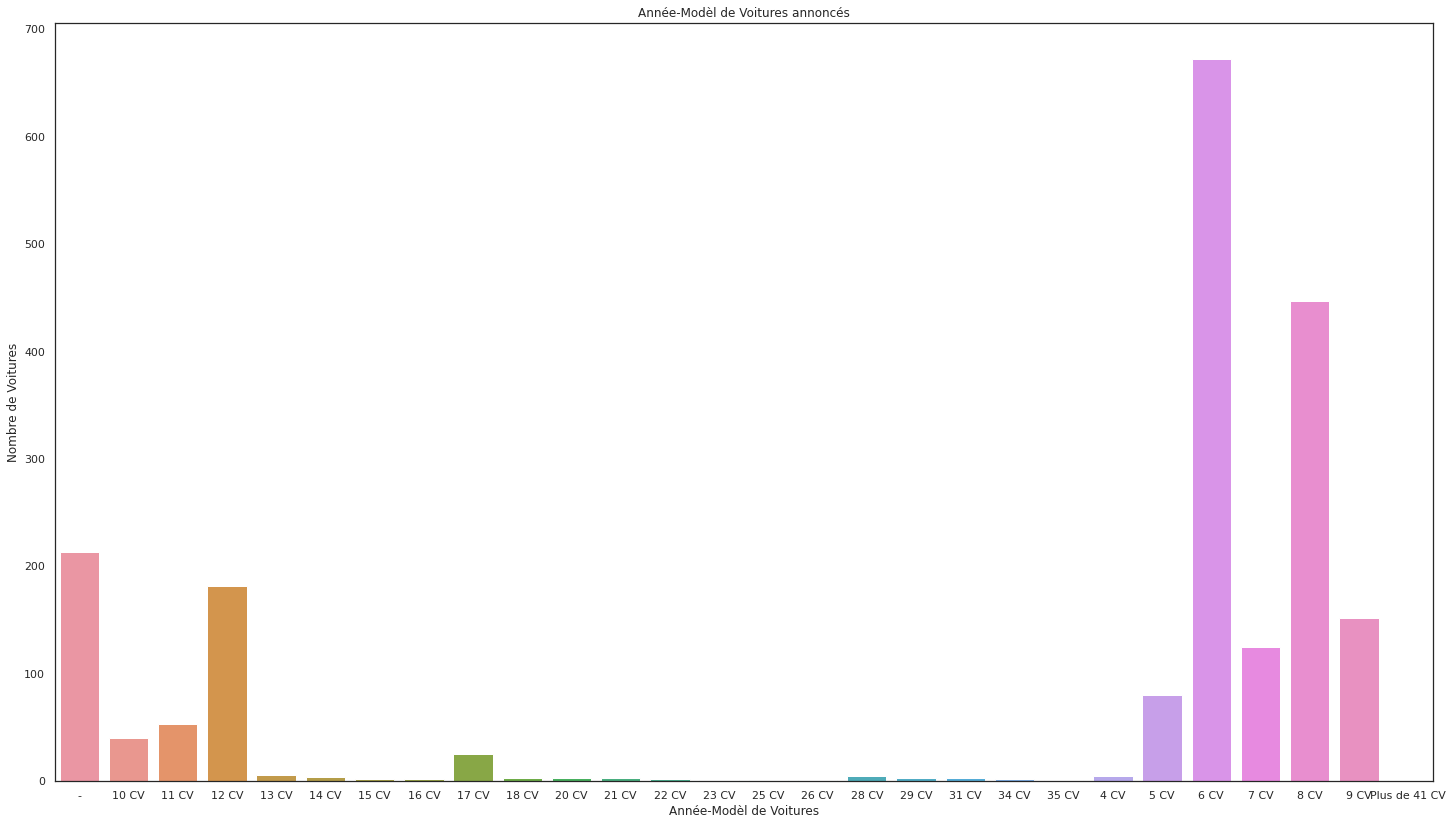

In [ ]:
# puissance fiscale
print("puissance fiscale des voitures annoncés")

sns.set(style='white')
plt.figure(figsize=(22, 13))
sns.countplot(x=sorted(df['PuissanceFiscale']),data=df)
plt.ylabel('Nombre de Voitures')
plt.xlabel('Année-Modèl de Voitures')
plt.title('Année-Modèl de Voitures annoncés')

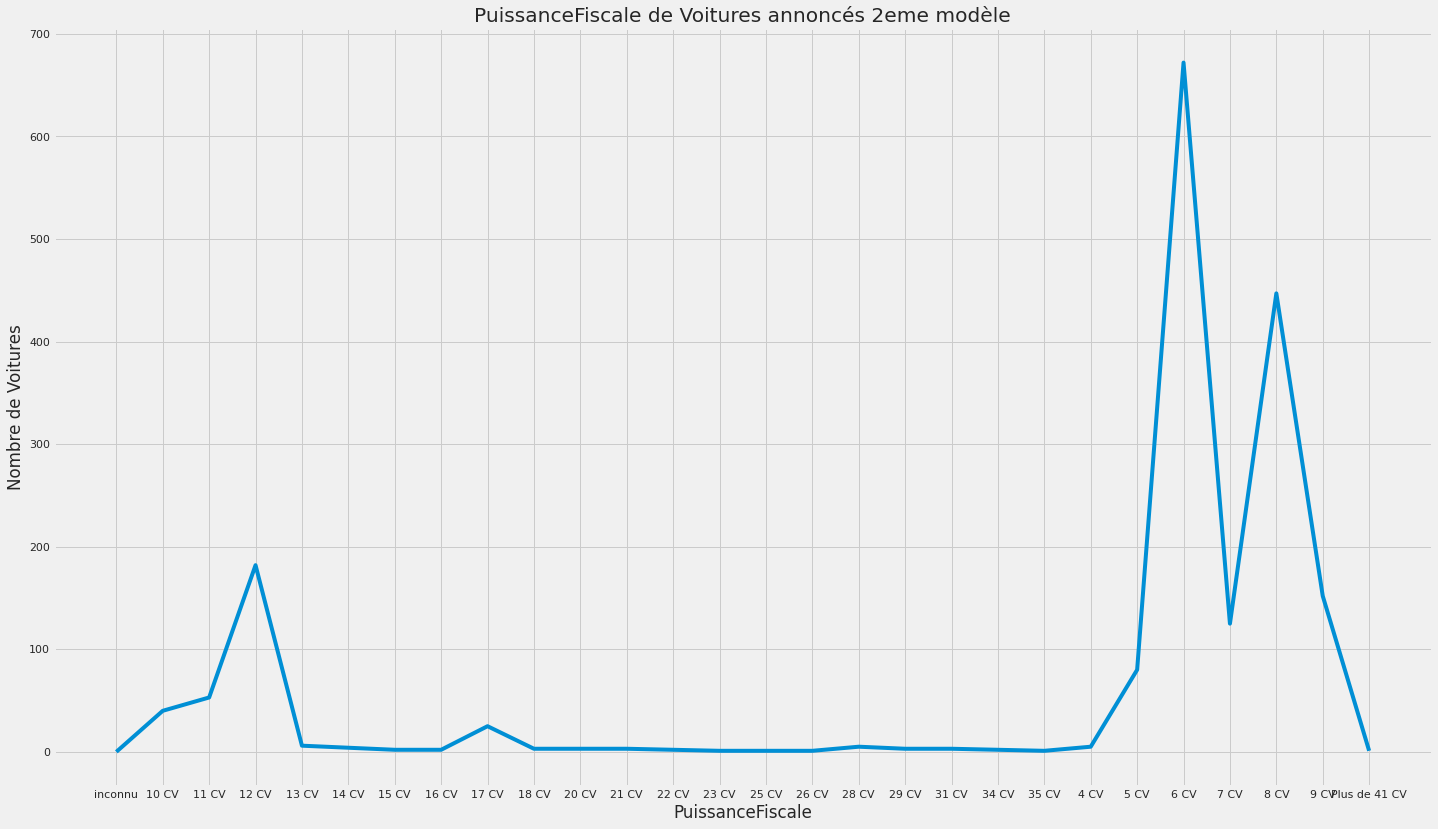

In [ ]:
#PuissanceFiscale de Voitures annoncés
plt.style.use('fivethirtyeight')
g=[]
for i in range(len(df)):
  g.append(df["PuissanceFiscale"][i])
h=list(sorted(set(g)))
h[0]='inconnu'
d=[] 
for i in range(0,len(h)):
  cpt=0
  for j in range(0,len(df)):
    if (df['PuissanceFiscale'][j]==h[i]):
      cpt+= 1
  d.append(cpt)
plt.figure(figsize=(22, 13))
plt.plot(h,d)
plt.ylabel('Nombre de Voitures')
plt.xlabel('PuissanceFiscale')
plt.title('PuissanceFiscale de Voitures annoncés 2eme modèle')
plt.show()

Text(0.5, 1.0, 'kilometrage minimale de Voitures proposée')

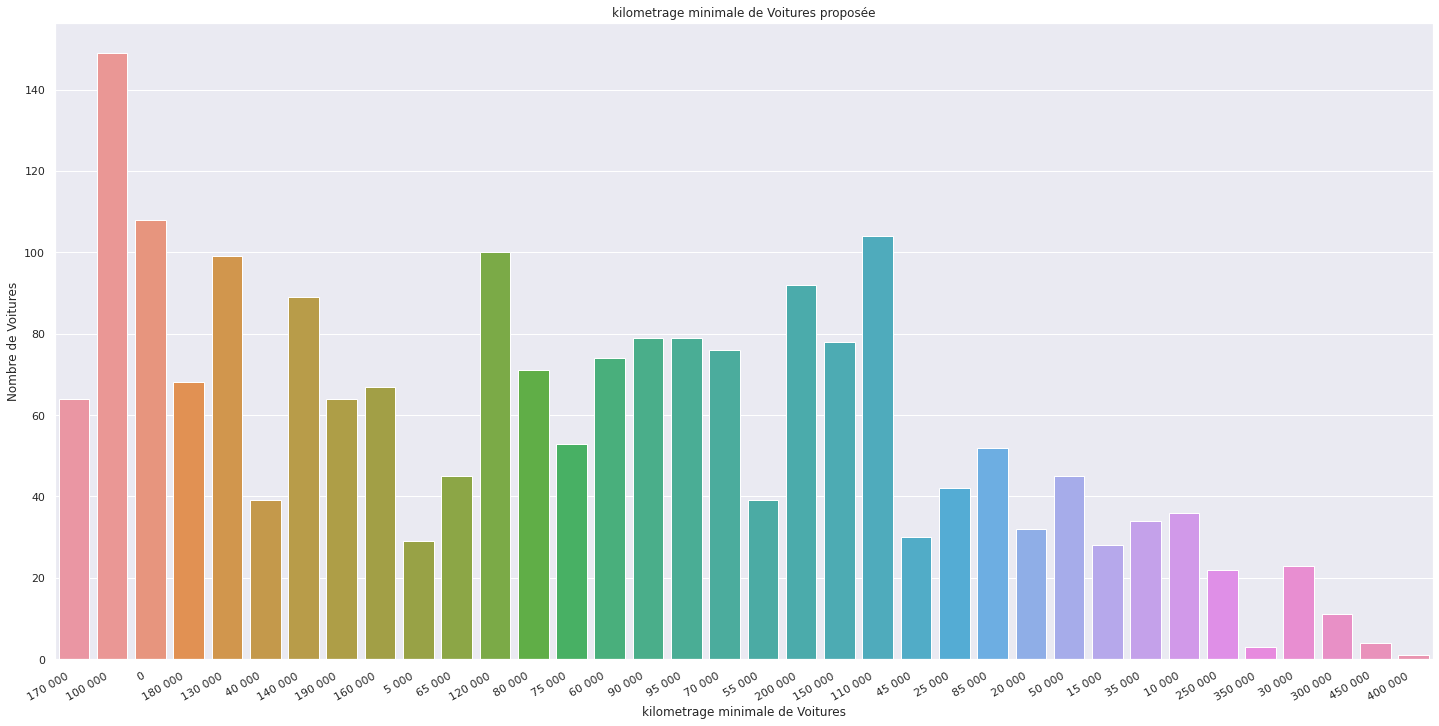

In [ ]:
# kilometrage minimale

sns.set(style='darkgrid')
plt.figure(figsize=(22, 13))
g=sns.countplot(x='KM_Min',data=df)
g.figure.autofmt_xdate()
plt.ylabel('Nombre de Voitures')
plt.xlabel('kilometrage minimale de Voitures')
plt.title('kilometrage minimale de Voitures proposée')

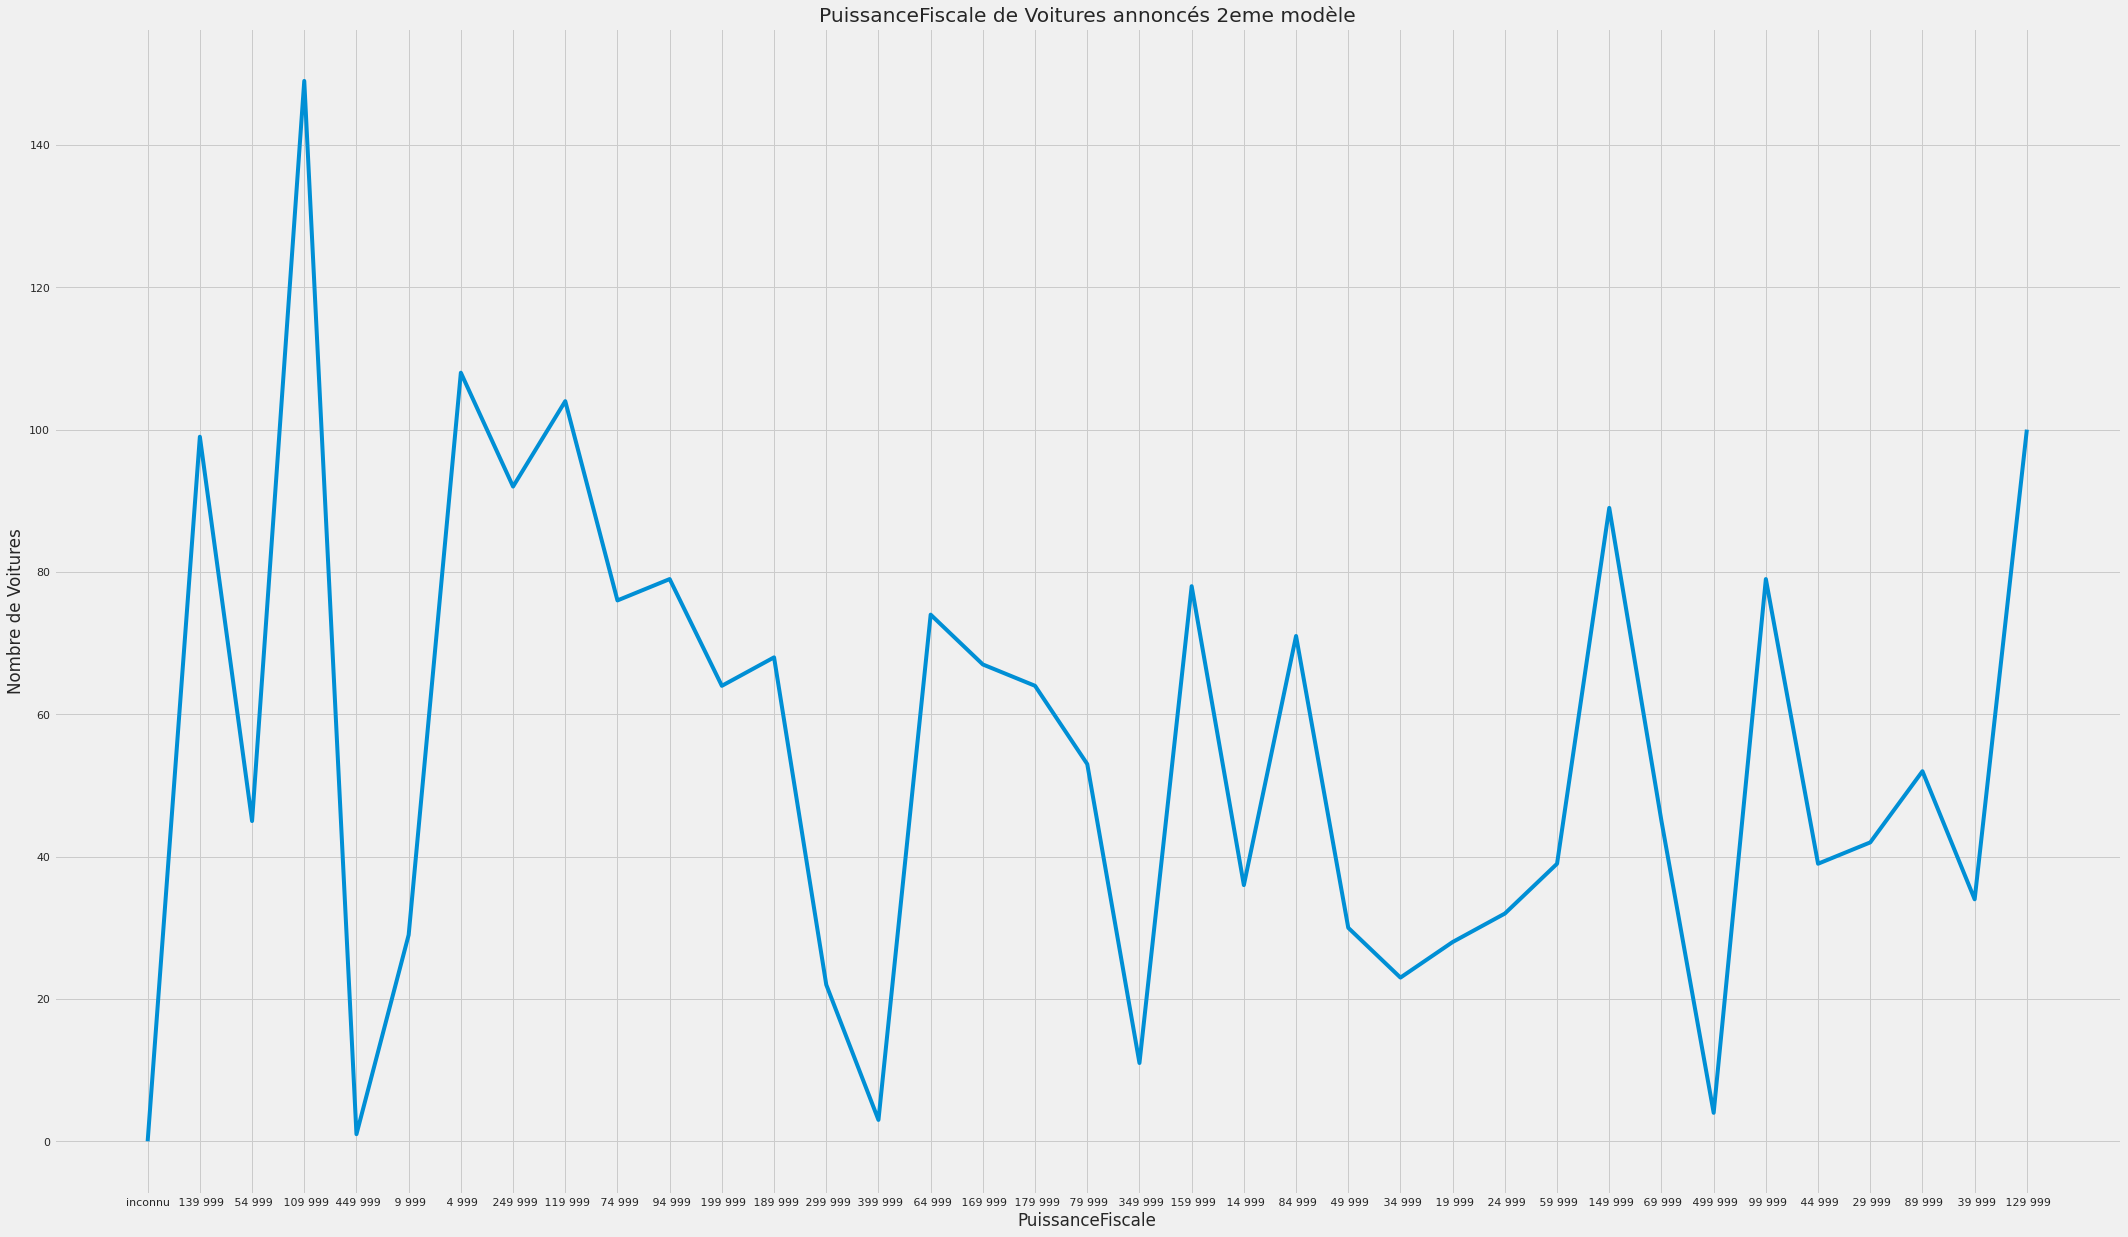

In [ ]:
#kilometrage maximale des Voitures annoncés
plt.style.use('fivethirtyeight')
g=[]
for i in range(len(df)):
  g.append(df["KM_Max"][i])
h=list(set(g))
h[0]='inconnu'
d=[] 
for i in range(0,len(h)):
  cpt=0
  for j in range(0,len(df)):
    if (df['KM_Max'][j]==h[i]):
      cpt+= 1
  d.append(cpt)
plt.figure(figsize=(33, 20))
plt.plot(h,d)
plt.ylabel('Nombre de Voitures')
plt.xlabel('kilometrage maximale')
plt.title(' kilometrage maximalede Voitures annoncés 2eme modèle')
plt.show()

Text(0.5, 1.0, 'kilometrage maximale de Voitures proposée')

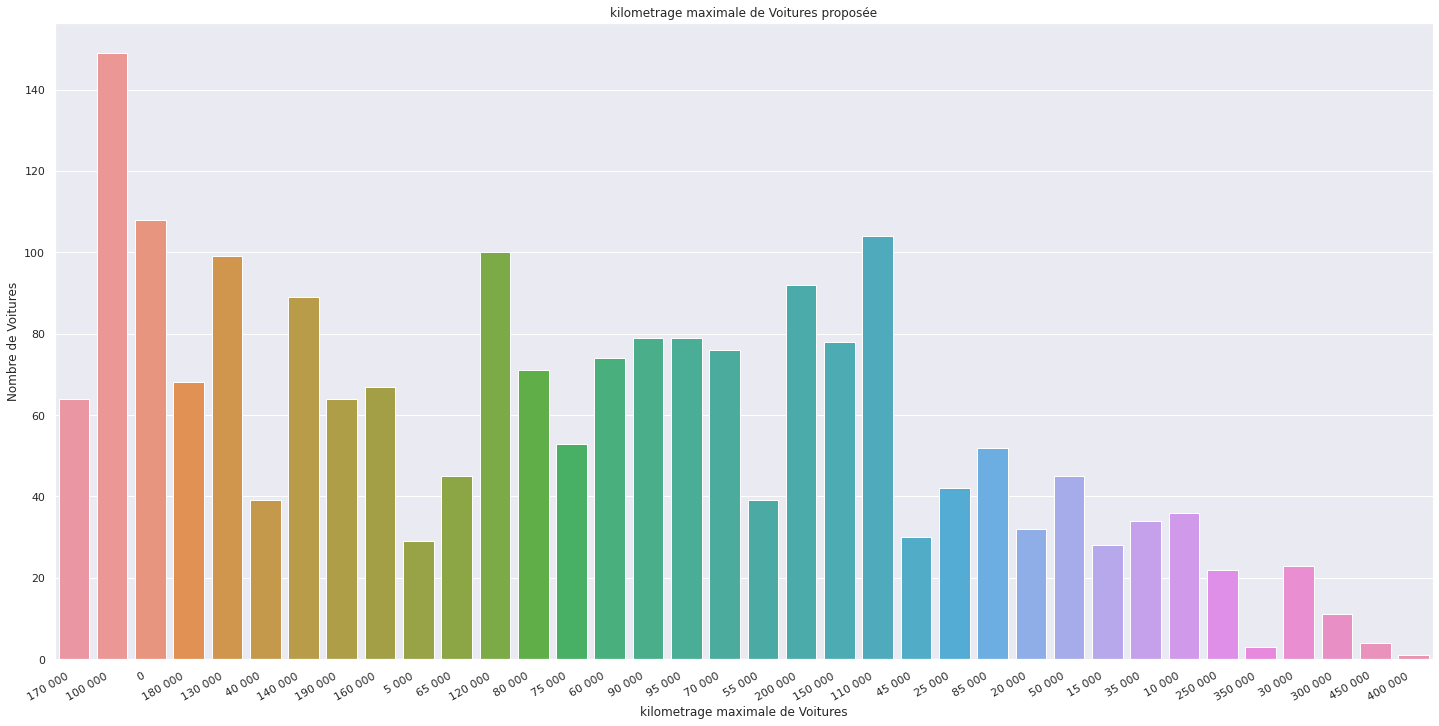

In [ ]:
# kilometrage maximale

sns.set(style='darkgrid')
plt.figure(figsize=(22, 13))
g=sns.countplot(x='KM_Min',data=df)
g.figure.autofmt_xdate()
plt.ylabel('Nombre de Voitures')
plt.xlabel('kilometrage maximale de Voitures') 
plt.title('kilometrage maximale de Voitures proposée 2eme modèle')

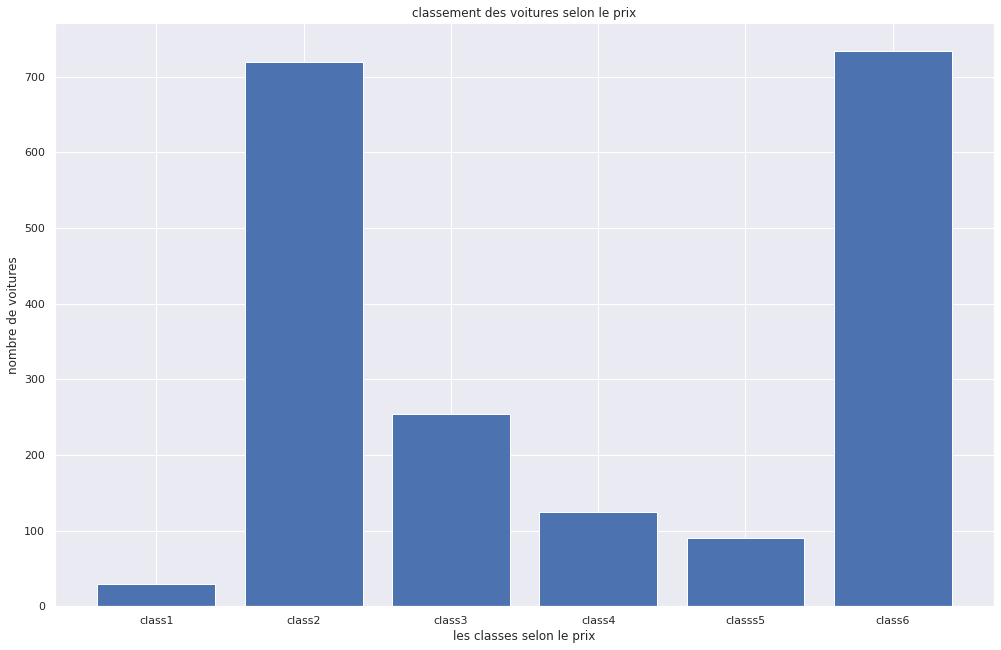

In [ ]:
# prix des voitures annoncés
part1=0 ;part2=0
part3=0 ;part4=0
part5=0 ;part6=0
for i in range(len(df)):
  if (df['Prix'][i] <= '100 000'):
    part1 += 1
  if (df['Prix'][i] >= '100000' and  df['Prix'][i] <= '19999'):
    part2 += 1
  if (df['Prix'][i] >= '200000' and  df['Prix'][i] <= '299999'):
    part3 += 1
  if (df['Prix'][i] >= '300000' and  df['Prix'][i] <= '399999'):
    part4 += 1
  if (df['Prix'][i] >= '400000' and  df['Prix'][i] <= '499999'):
    part5 += 1
  if (df['Prix'][i] >= '500 000'):
    part6 += 1

plt.figure(figsize=((15,10)))
x=[part1,part2,part3,part4,part5,part6]
y=['class1','class2','class3','class4','classs5','class6']
plt.bar(y,x)
plt.xlabel("les classes selon le prix")
plt.ylabel('nombre de voitures')
plt.title('classement des voitures selon le prix')
plt.show()


Text(0.5, 1.0, 'les marques')

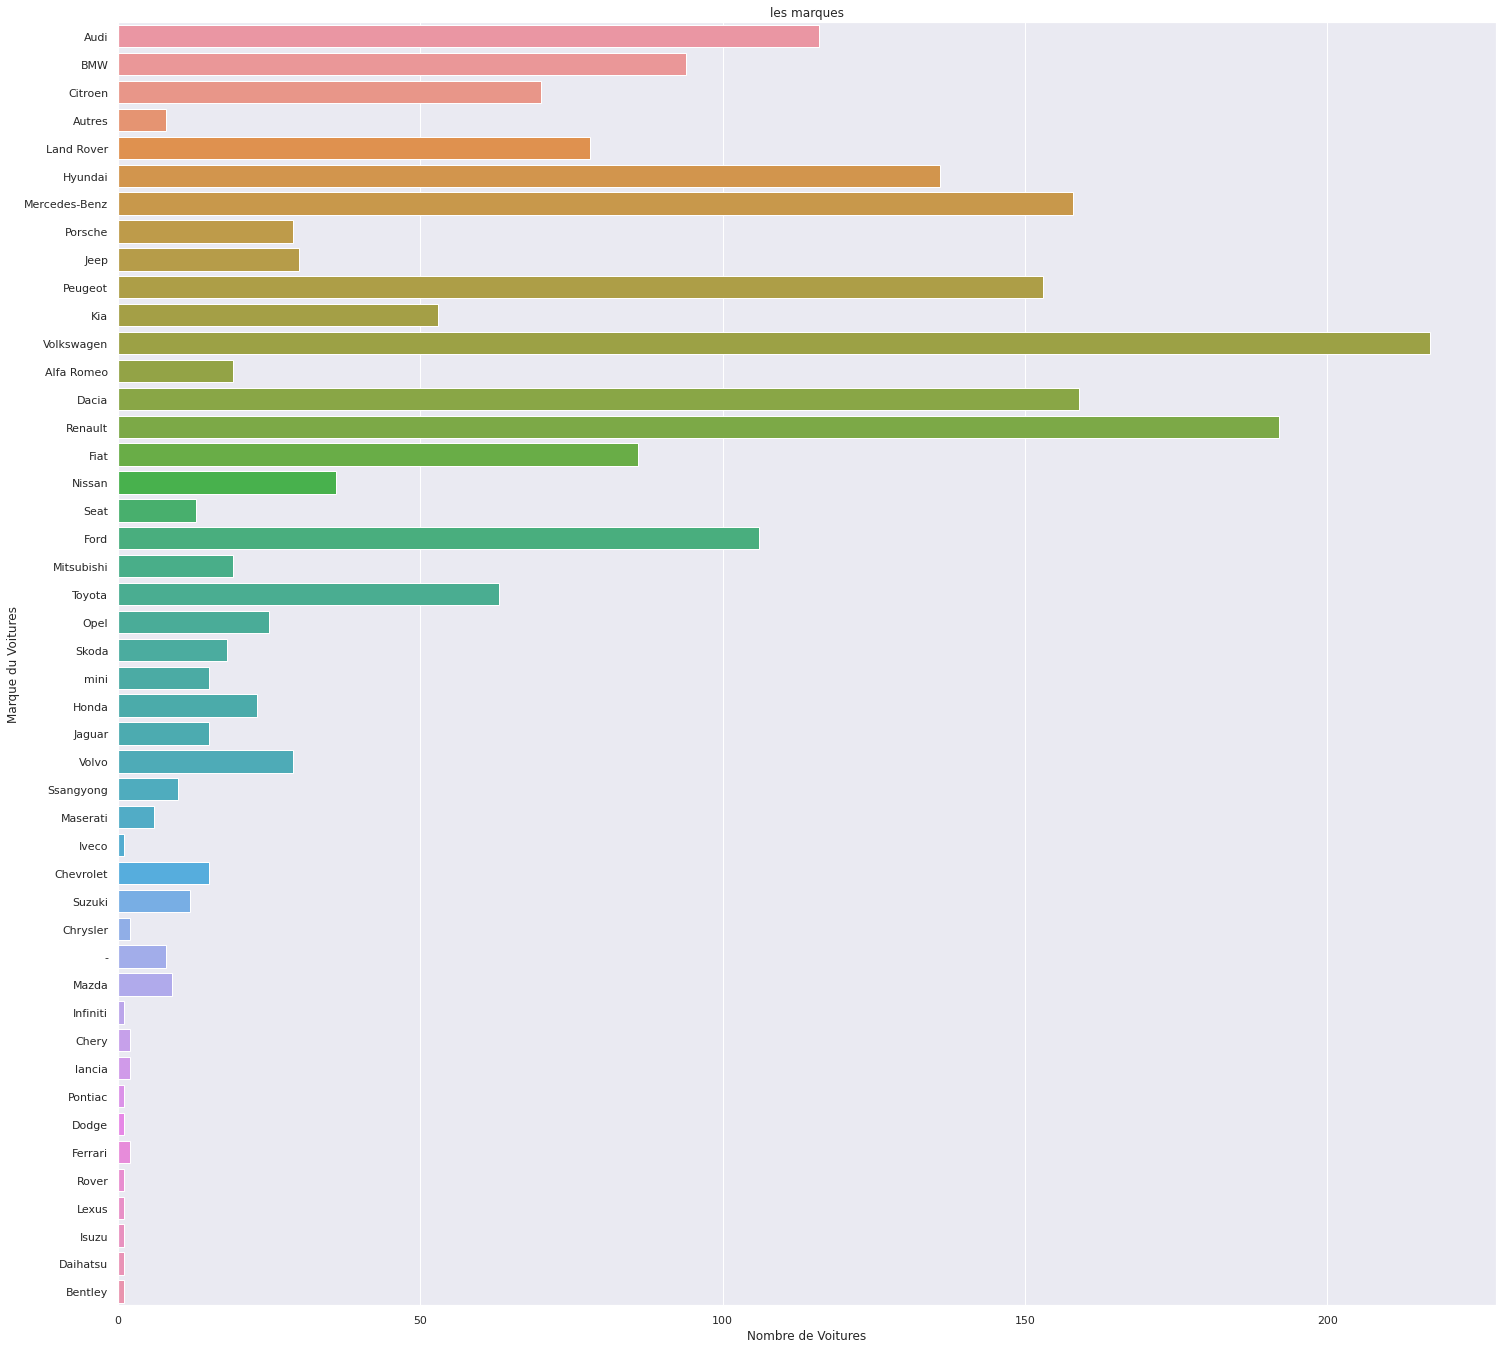

In [ ]:
# les marques 
sns.set(style='darkgrid')
plt.figure(figsize=(22, 22))
sns.countplot(y='Marqu',data=df)
plt.ylabel('Marque du Voitures')
plt.xlabel('Nombre de Voitures')
plt.title('les marques')


# Information sur les Villes 

In [ ]:
totalGoldMedals = df["Ville"].reset_index(name='Ann').head(5)
print("top 5 des marques de voitures proposés")
print(totalGoldMedals["Ann"])

top 5 des marques de voitures proposés
0     Casablanca
1          Rabat
2        Kénitra
3     Mohammedia
4        Kénitra
Name: Ann, dtype: object


Text(0.5, 1.0, 'les annoncés')

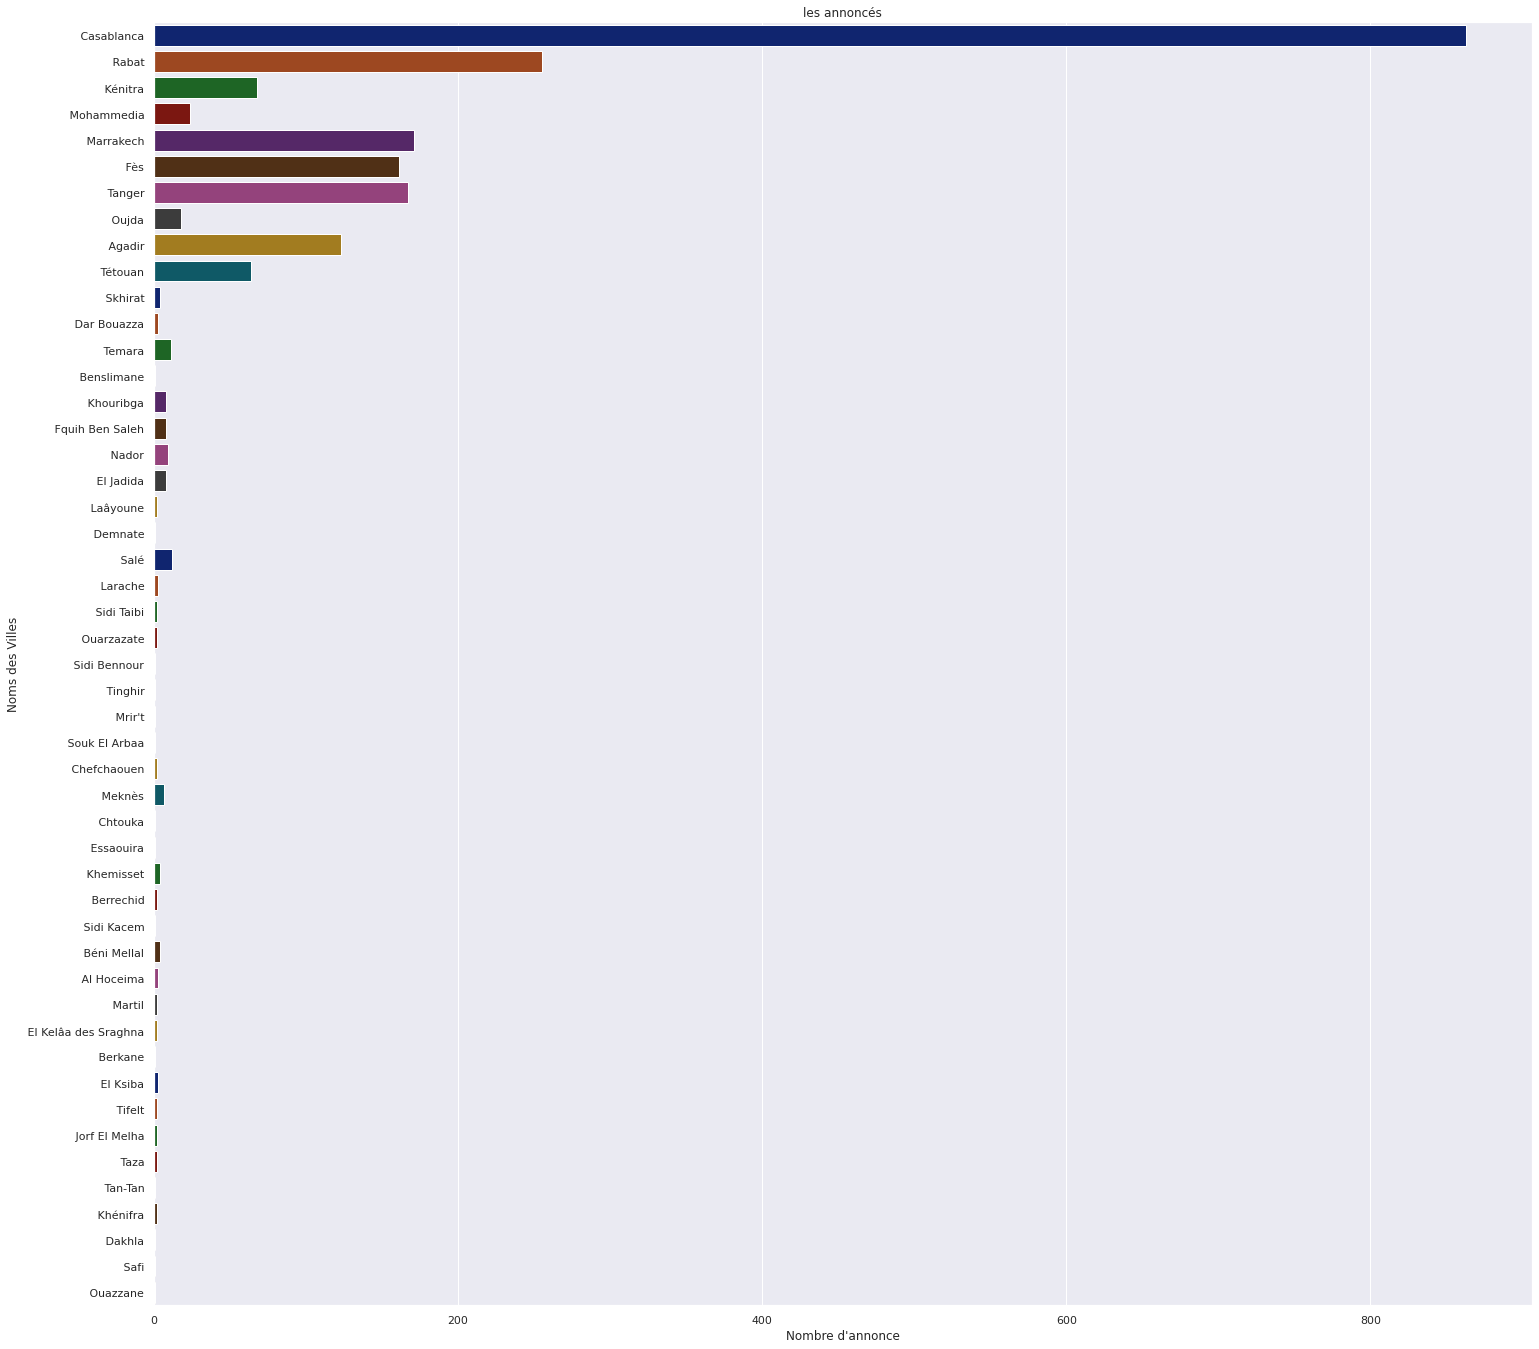

In [ ]:
#les villes 

sns.set(style='darkgrid')
plt.figure(figsize=(22, 22))
sns.countplot(y='Ville',data=df,palette='dark')
plt.ylabel('Noms des Villes')
plt.xlabel('Nombre d\'annonce')
plt.title('les annoncés')

Text(0.5, 1.0, 'les annoncés')

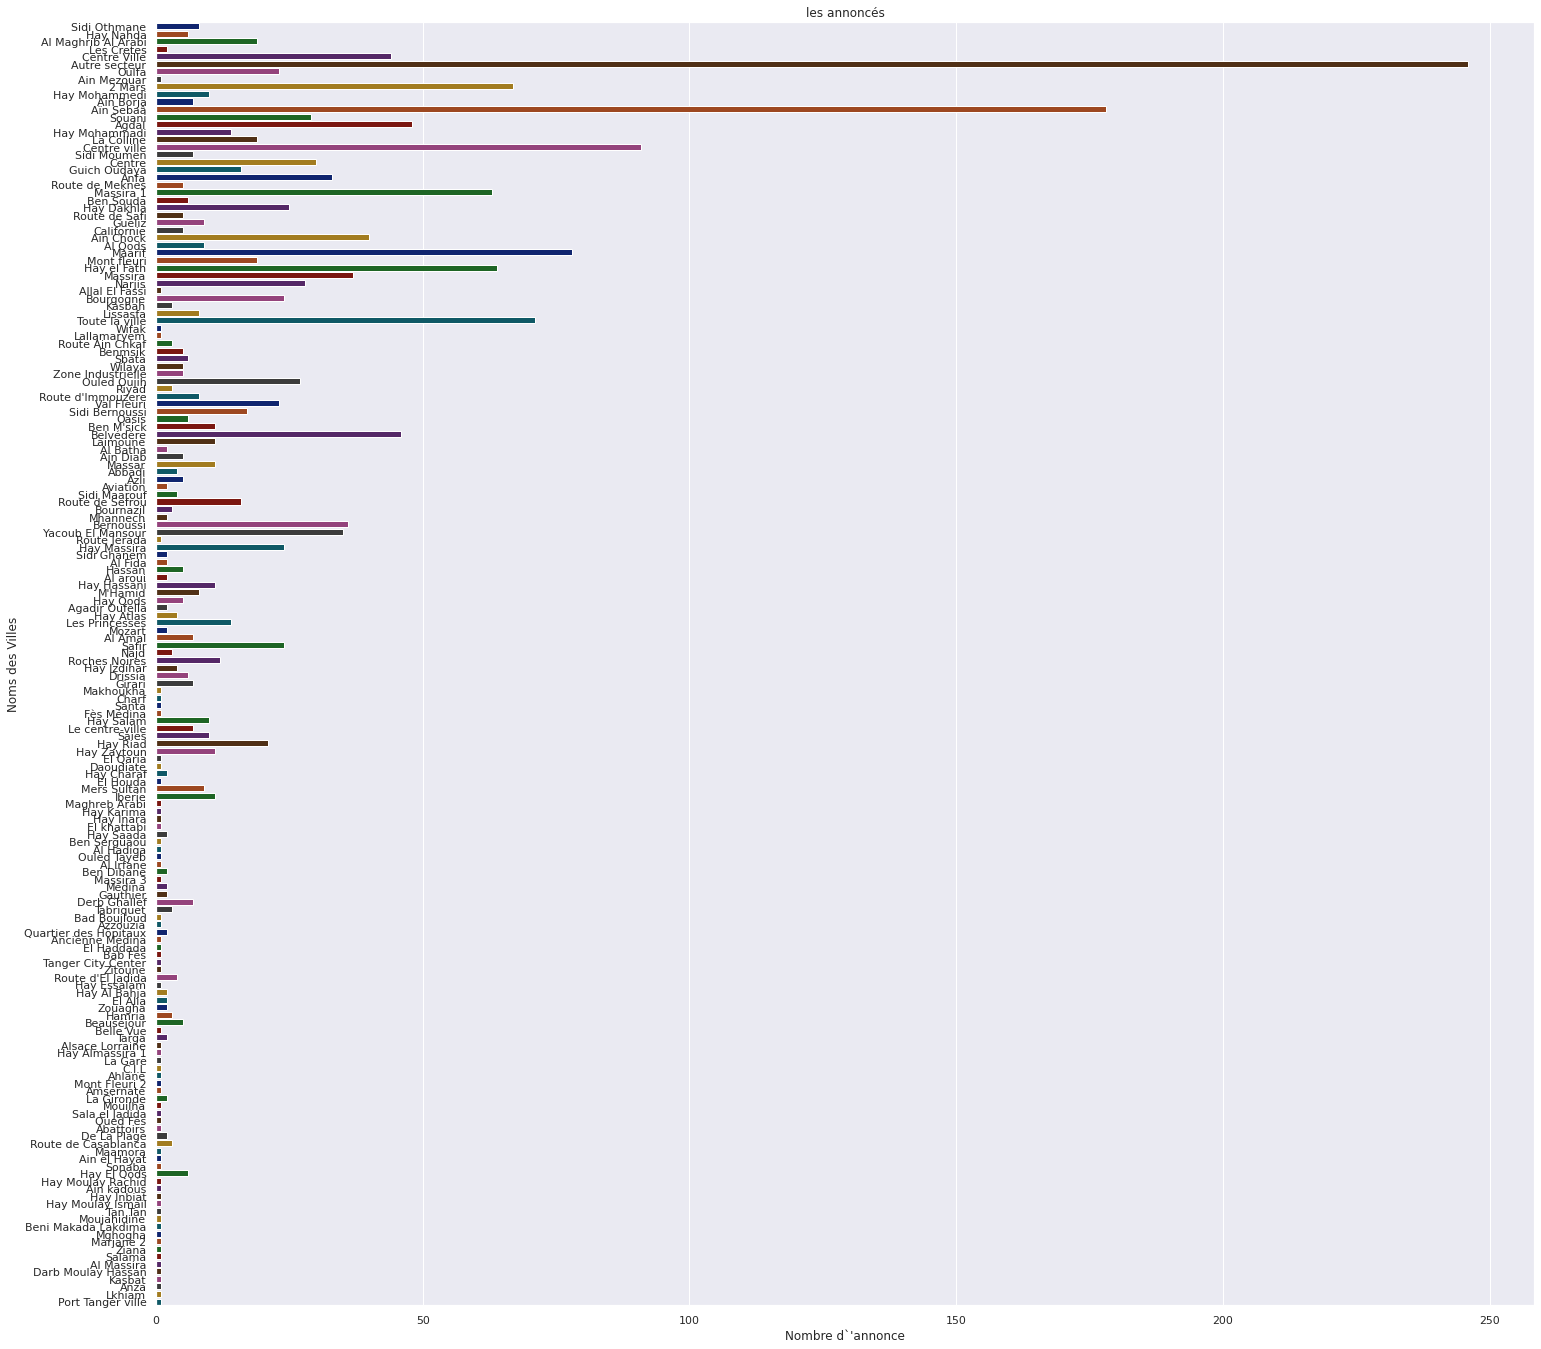

In [ ]:
#les secteurs 

sns.set(style='darkgrid')
plt.figure(figsize=(22, 22))
sns.countplot(y='Secteur',data=df,palette='dark')
plt.ylabel('Noms des Villes')
plt.xlabel('Nombre d`\'annonce')
plt.title('les annoncés')

In [ ]:
# nombre d'annonces de chaque villes 

g=[]
for i in range(len(df)):
  g.append(df["Ville"][i])
h=list(set(g))
rr=[]
for i in range(len(h)):
  cpt=0
  for j in range(len(df)):
    if(df['Ville'][j]==h[i]):
      cpt+=1
  rr.append(cpt)
rrr=[]
for j in range(len(df)):
  if(df['Ville'][j]==h[tt]):
      rrr.append(df['Secteur'][j])
z = pd.DataFrame({"villes" : h ,"nombre d'annonces" : rr})
print(z)

                   villes  nombre d'annonces
0    El Kelâa des Sraghna                  2
1                  Mrir't                  1
2               Berrechid                  2
3                    Safi                  1
4               El Jadida                  8
5               Khemisset                  4
6                  Martil                  2
7             Béni Mellal                  4
8            Sidi Bennour                  1
9               Khouribga                  8
10                    Fès                161
11                   Salé                 12
12               El Ksiba                  3
13                Tan-Tan                  1
14                Tinghir                  1
15               Khénifra                  2
16                  Nador                  9
17             Benslimane                  1
18        Fquih Ben Saleh                  8
19                Demnate                  1
20             Sidi Kacem                  1
21        

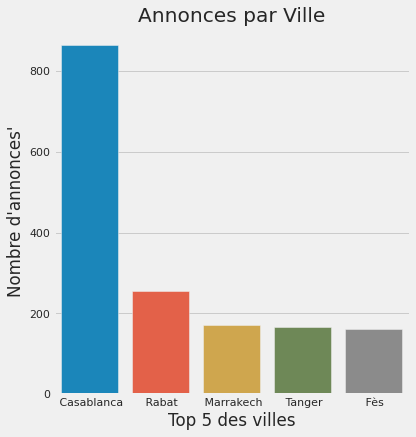

In [ ]:
plt.style.use('fivethirtyeight')
totalGoldMedals = df["Ville"].value_counts().reset_index(name='Ann').head(5)
g = sns.catplot(x="index", y="Ann", data=totalGoldMedals,
                height=6, kind="bar");
g.set_xlabels("Top 5 des villes")
g.set_ylabels("Nombre d'annonces'")
plt.title('Annonces par Ville');


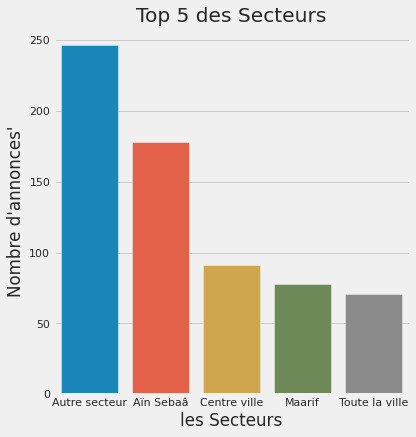

In [ ]:
plt.style.use('fivethirtyeight')
totalGoldMedals = df["Secteur"].value_counts().reset_index(name='Ann').head(5)
g = sns.catplot(x="index", y="Ann", data=totalGoldMedals,
                height=6, kind="bar");
g.set_xlabels("les Secteurs")
g.set_ylabels("Nombre d'annonces'")
plt.title('Top 5 des Secteurs');

# A propos des Marques


Text(0.5, 1.0, 'les marques')

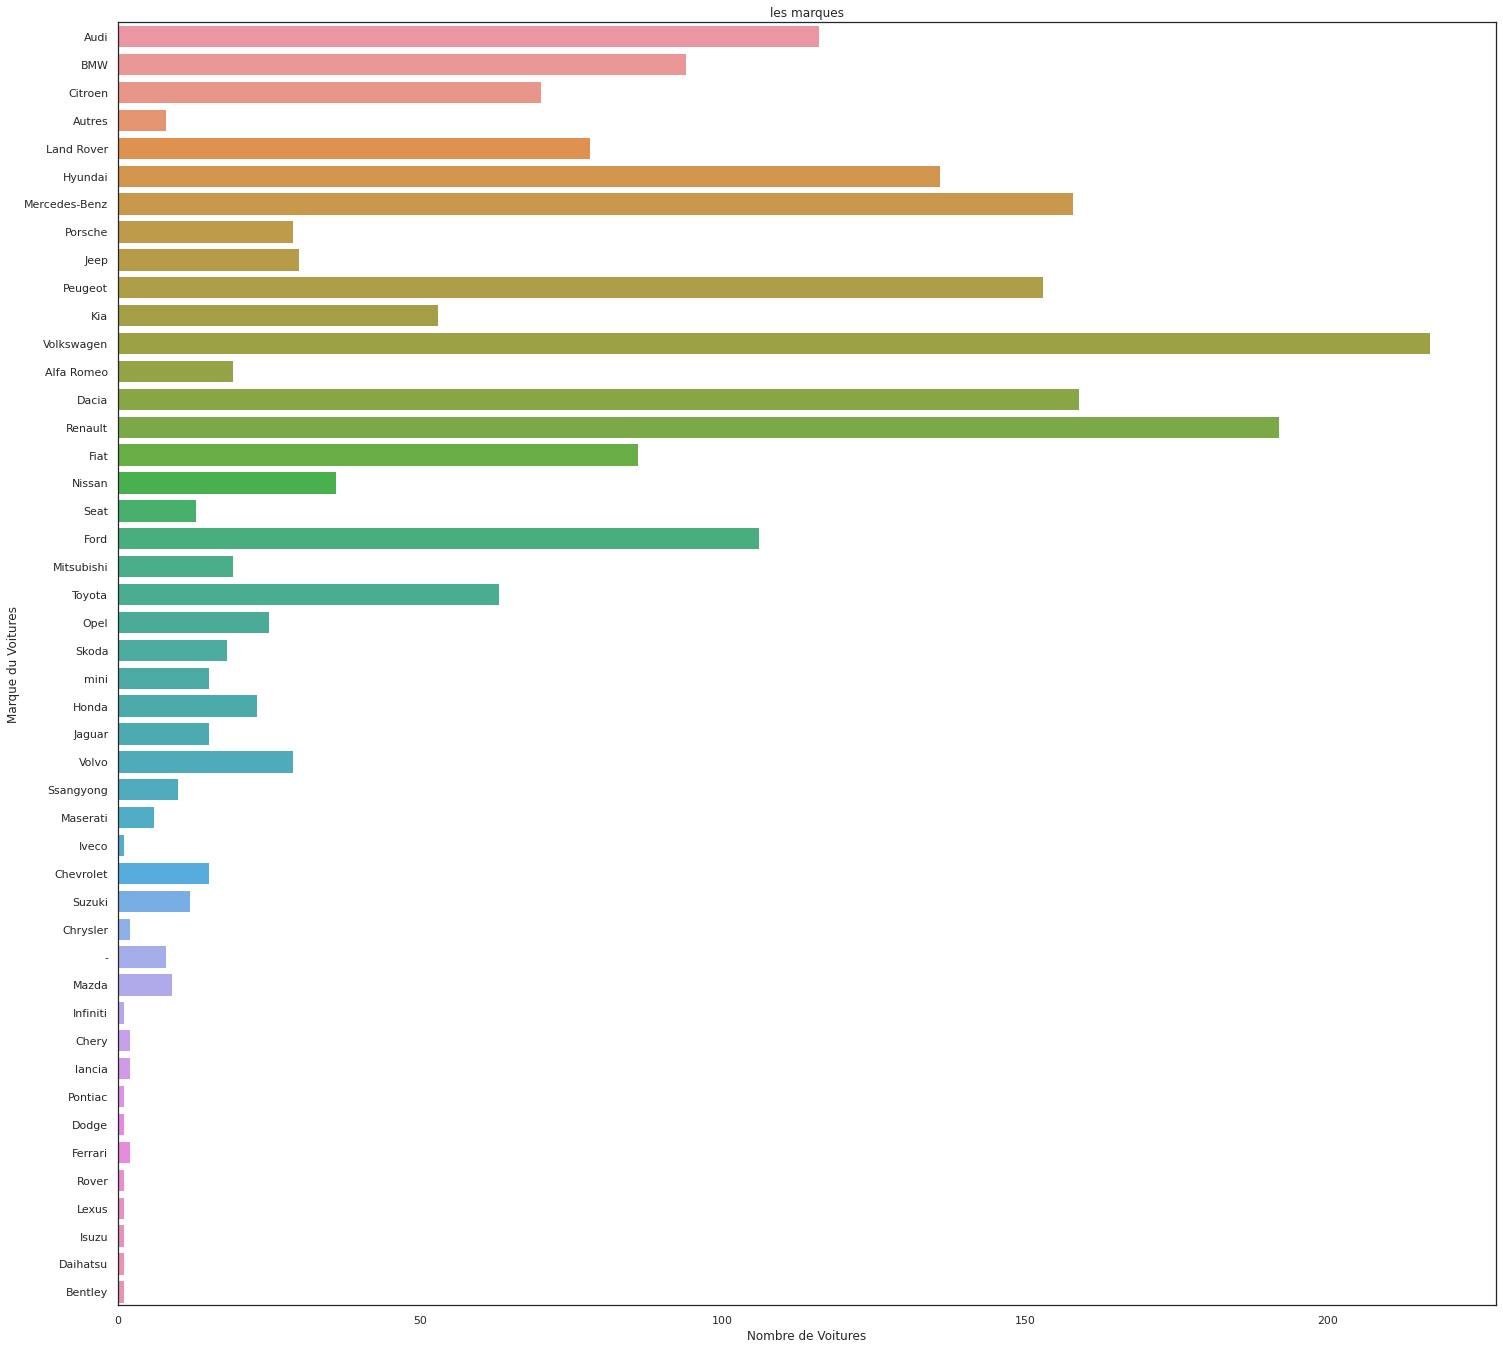

In [ ]:
# les marques 
sns.set(style='white')
plt.figure(figsize=(22, 22))
sns.countplot(y='Marqu',data=df)
plt.ylabel('Marque du Voitures')
plt.xlabel('Nombre de Voitures')
plt.title('les marques')

In [ ]:
top5marqueee = df["Marqu"].value_counts().reset_index(name='Ann').head(5)
print("top 5 des marques de voitures proposés")
print(top5marqueee["Ann"])

top 5 des marques de voitures proposés
0    217
1    192
2    159
3    158
4    153
Name: Ann, dtype: int64


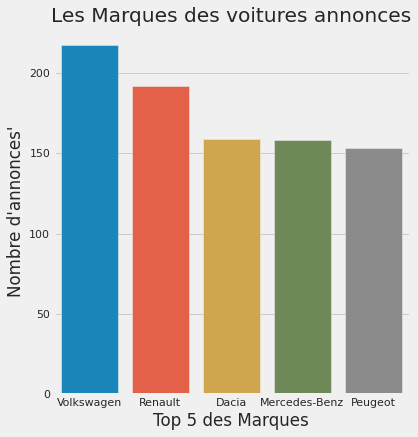

In [ ]:
plt.style.use('fivethirtyeight')
g = sns.catplot(x="index", y="Ann", data=top5marqueee,
                height=6, kind="bar");
g.set_xlabels("Top 5 des Marques")
g.set_ylabels("Nombre d'annonces'")
plt.title('Les Marques des voitures annonces');

In [ ]:
top5modele = df["Modèle"].value_counts().reset_index(name='Ann').head(5)
print("top 5 des marques de voitures proposés")
print(top5modele["Ann"])

top 5 des marques de voitures proposés
0    121
1     63
2     50
3     49
4     40
Name: Ann, dtype: int64


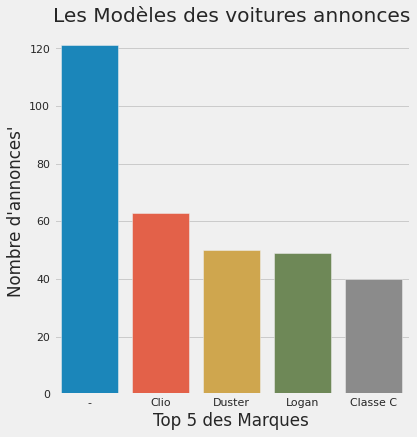

In [ ]:
plt.style.use('fivethirtyeight')
g = sns.catplot(x="index", y="Ann", data=top5modele,
                height=6, kind="bar");
g.set_xlabels("Top 5 des Marques")
g.set_ylabels("Nombre d'annonces'")
plt.title('Les Modèles des voitures annonces');

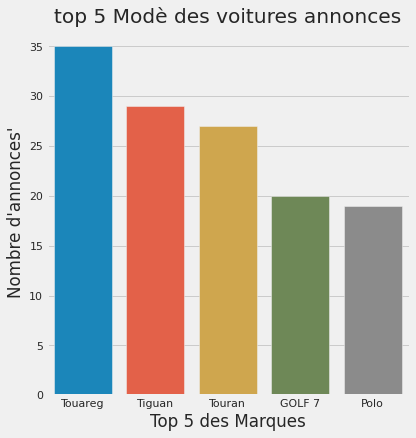

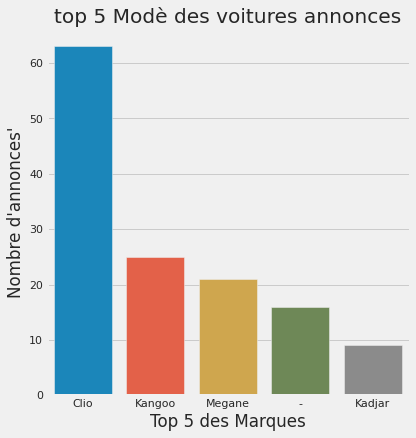

In [ ]:
plt.style.use('fivethirtyeight')
tr=['Volkswagen','Renault']
for i in range(len(tr)):
  Modelvoiture = df[(df['Marqu']==tr[i])]
  top5marque = Modelvoiture["Modèle"].value_counts().reset_index(name='Ann').head(5)
  g = sns.catplot(x="index", y="Ann", data=top5marque,
                  height=6, kind="bar",row_order=3);
  g.set_xlabels("Top 5 des Marques")
  g.set_ylabels("Nombre d'annonces'")
  plt.title('top 5 Modèle des voitures annonces')

# Information relatif à la date de publication des annonces


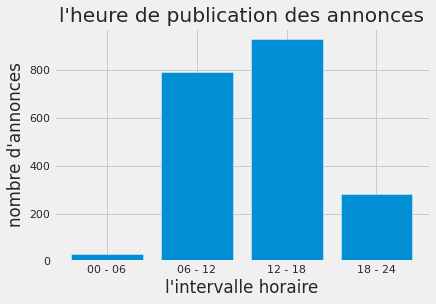

In [ ]:
# l'heure de publication 
part1=0 ;part2=0
part3=0 ;part4=0
for i in range(len(df)):
  if (df['Temps_de_publication'][i] > '00-00-00' and  df['Temps_de_publication'][i] < '06-00-00'):
    part1 += 1
  if (df['Temps_de_publication'][i] >= '06-00-00' and  df['Temps_de_publication'][i] < '12-00-00'):
    part2 += 1
  if (df['Temps_de_publication'][i] >= '12-00-00' and  df['Temps_de_publication'][i] <= '18-00-00'):
    part3 += 1
  if (df['Temps_de_publication'][i] >= '18-00-00' and  df['Temps_de_publication'][i] <= '24-00-00'):
    part4 += 1

x=[part1,part2,part3,part4]
y=['00 - 06','06 - 12', '12 - 18','18 - 24']
plt.bar(y,x)
plt.ylabel("nombre d'annonces")
plt.title("l'heure de publication des annonces")
plt.xlabel("l'intervalle horaire")

plt.show()

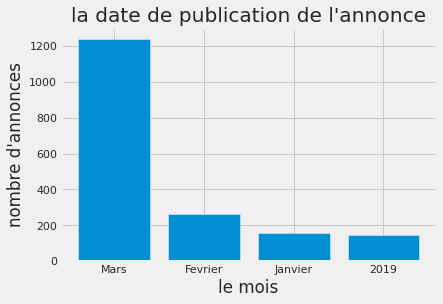

In [ ]:
# l'heure de publication 
part1=0 ;part2=0
part3=0 ;part4=0
for i in range(len(df)):
  if (df['Date_de_publication'][i] > '2020-03-01' and  df['Date_de_publication'][i] < '2020-03-31'):
    part1 += 1
  if (df['Date_de_publication'][i] > '2020-02-01' and  df['Date_de_publication'][i] < '2020-02-29'):
    part2 += 1
  if (df['Date_de_publication'][i] > '2020-01-01' and  df['Date_de_publication'][i] < '2020-01-31'):
    part3 += 1
  if  df['Date_de_publication'][i] < '2019-12-31':
    part4 += 1
 
x=[part1,part2,part3,part4]
y=['Mars','Fevrier',"Janvier","2019"]
plt.bar(y,x)
plt.ylabel("nombre d'annonces")
plt.title("la date de publication de l'annonce")
plt.xlabel('le mois')
plt.show()

Text(0.5, 1.0, "nombre d' annonces par jour")

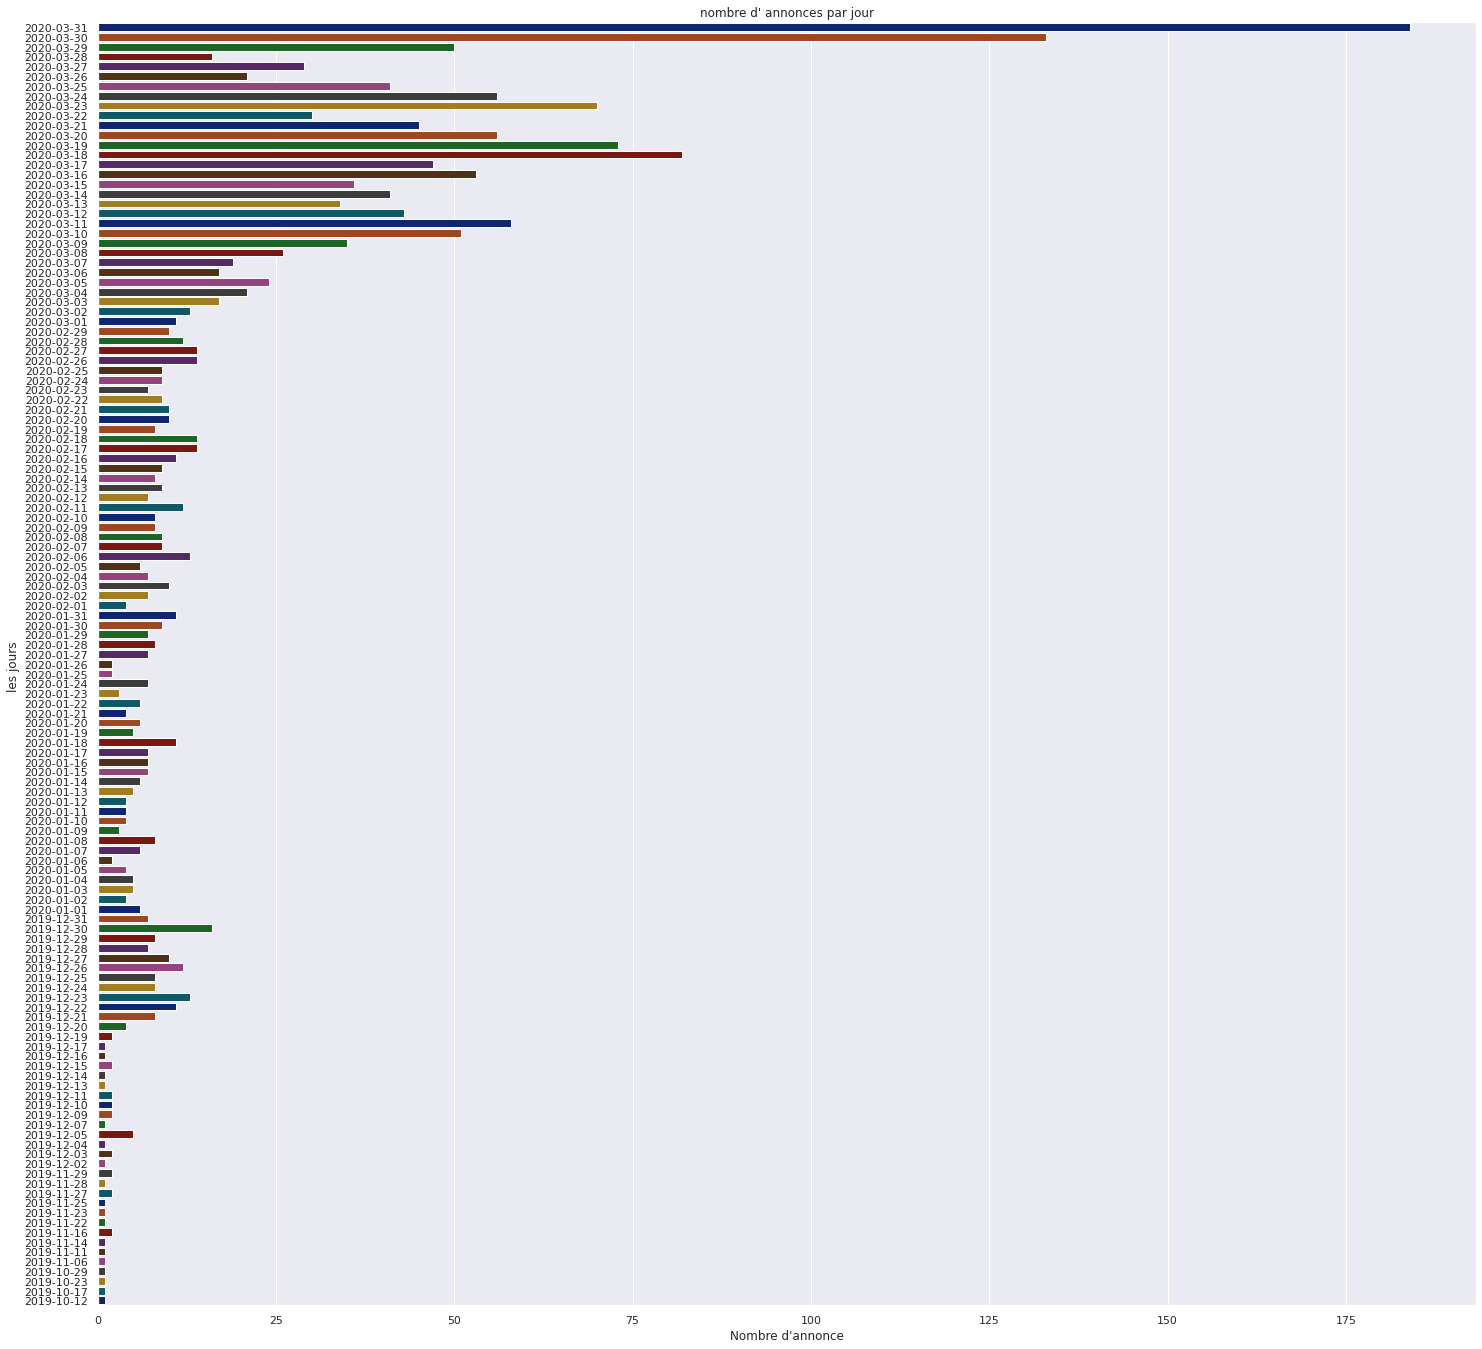

In [ ]:
#nombre d'annonces par jour

sns.set(style='darkgrid')
plt.figure(figsize=(22, 22))
sns.countplot(y='Date_de_publication',data=df,palette='dark')
plt.ylabel('les jours ')
plt.xlabel('Nombre d\'annonce')
plt.title('nombre d\' annonces par jour')